Lab 2

This lab will focus on the Jaynes-Cumming Model (JCM) used to describe the interaction between a  single electromagnetic mode and a two-levelsystem (TLS) confined in a cavity.

The JCM was introduced in lecture 3 of QS2 Part 4 when describing a superconducting qubit coupled to a microwavecavity.  In this set of exercises you will explore the relation between the qubit-cavity detuning ($\Delta$), controlled by an external parameter such as flux or gate voltage, the qubit-cavity coupling rate (g), and the losses in the qubit ($\gamma$) andcavity ($\kappa$).

Import qutip and other packages

In [1]:
# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt as sqrt
from numpy import pi as pi

# make qutip available in the rest of the notebook
from qutip import *

# Exercise 1

Create a general system based on the Jaynes-Cumming model, evolve the
state and visualize the results.
[QuTiP Lecture 1 - JCM](https://nbviewer.ipython.org/github/jrjohansson/qutip-lectures/blob/master/Lecture-1-Jaynes-Cumming-model.ipynb)

## General JCM

Use the following parameters to create a system based on the general JCM.

The hamiltonian for this system is:
$H = \hbar\omega_c a^\dagger a + \frac{1}{2}\hbar\omega_a \sigma_z + \hbar g\left(a^{\dagger}+a\right)\left(\sigma_{-}+\sigma_{+}\right)$

[QuTiP Quantum Operators](https://qutip.org/docs/latest/apidoc/functions.html?highlight=qutip%20operators#module-qutip.operators)

In [2]:
fc = 1.0            # cavity frequency
fa = 1.0            # atom frequency
g  = 0.05           # coupling strength
kappa = 0.005       # cavity dissipation rate
gamma = 0.05        # atom dissipation rate
N = 15              # number of cavity fock states
n_th_a = 0.0        # avg number of thermal bath excitation

Type your codes here

In [3]:
# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))


# Hamiltonian
H = fc * a.dag() * a + fa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

## Collapse Operators

Create the collapse operators from the losses ($\gamma$, $\kappa$ and $\bar{n}$) in the system. <br>

Remember in the session 1, you have created the collapse operators for harmonic oscillator. In this exercise, you not only need to consider the cavity (harmonic oscillator) but also the atom-like state. For the atom-like state, the collapse operator is given by $\sqrt{\gamma}\sigma_{-}$.

Type your result here

In [54]:
c_ops = []

# cavity relaxation
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(sqrt(rate) * a)

# cavity excitation, if temperature > 0
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(sqrt(rate) * a.dag())

# qubit relaxation
rate = gamma
if rate > 0.0:
    c_ops.append(sqrt(rate) * sm)

## Evolve the system

Use the built-in function [mesolve](https://qutip.org/docs/latest/apidoc/functions.html?highlight=mesolve#module-qutip.mesolve) to simulate how the system evolve from a user-defined initial state looking at the expectation values of $a^{\dagger}a$ and $\sigma_{+}\sigma_{-}$

Type your codes here

In [58]:
tlist = np.linspace(0,100,101)

# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom

output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])

n_c = output.expect[0]
n_a = output.expect[1]

Visualise the excitation probabilities

Type your codes here

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

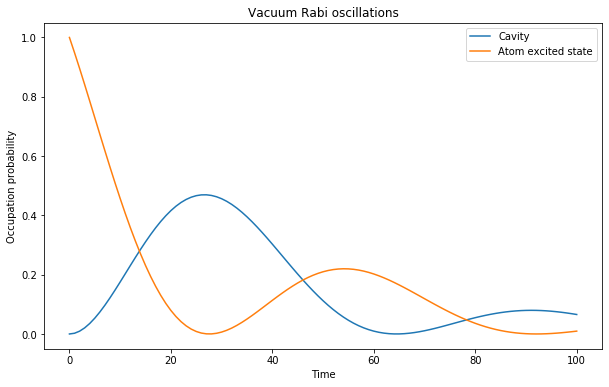

In [59]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')

Now vary the losses of the system, explore how the excitation probabilities change.

# Exercise 2

(i) Construct the single-junction Cooper Pair Box qubit Hamiltonian in 
QuTiP. <br>
(ii) Plot the single-junction CPB qubit spectrum as a function of offset
charge for different ${E_j}/{E_c}$ ratios. <br>
(iii) Modify the qubit hamiltonian for split-junction CPB and calculate
the transition energy $E_{01}$ as a function of applied flux. <br>
[QuTiP Lecture 11 - Charge Qubits](https://nbviewer.ipython.org/github/jrjohansson/qutip-lectures/blob/master/Lecture-11-Charge-Qubits.ipynb)

## Single-junction CPB Hamiltonian

The single-junction CPB qubit hamiltonian is given by: <br>
$\hat{H} = 4E_C\left(\hat{n}-n_g\right)^2-E_J\textrm{cos}\hat{\phi}$

Write a function that returns the qubit hamiltonian from given parameters $E_C$, $E_J$ and $n_g$. You will also need to define the charge space dimensions that the system will be evaluated in.

Type your codes here

In [2]:
def hamiltonian(Ec, Ej, N, ng):
    c = charge(N) - qeye(2*N+1)*ng
    m = 4 * Ec * c * c - Qobj(0.5 * Ej * (np.diag(np.ones(2*N), 1) + np.diag(np.ones(2*N), -1)))
    return m

def hamiltonian(Ec, Ej, N, ng):
    
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) + 0.5 * Ej * (np.diag(-np.ones(2*N), 1) + 
                                                               np.diag(-np.ones(2*N), -1))
    return Qobj(m)

Check if your hamiltonian is hermitian using [isherm](https://qutip.org/docs/latest/apidoc/functions.html?highlight=isherm#qutip.qobj.isherm)

## Plot single-junction CPB spectrum

Given $E_C=230MHz$, $E_J=500MHz$ and $N=10$, solve the qubit's eigenenergies and plot the qubit spectrum as a function of $n_g$

Type your codes here

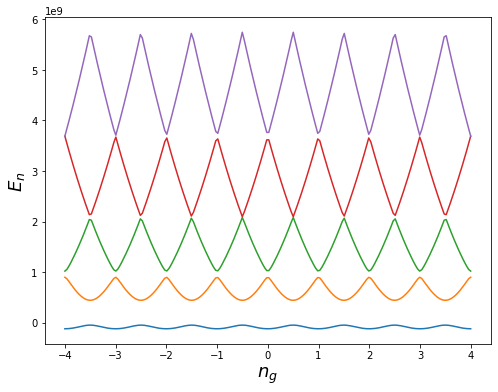

In [78]:
N = 10
Ej = 500e6
Ec = 230e6

ng_vec = np.linspace(-4, 4, 200)

# Define plot function
def plot_energies(ng_vec, energies, levels=10):
    """
    Plot energy levels as a function of bias parameter ng_vec.
    """
    fig, ax = plt.subplots(figsize=(8,6))

    for n in range(len(energies[0,0:levels])):
        ax.plot(ng_vec, energies[:,n])
    #ax.set_ylim(ymax[0], ymax[1])
    ax.set_xlabel(r'$n_g$', fontsize=18)
    ax.set_ylabel(r'$E_n$', fontsize=18)
    
energies = np.array(np.real([hamiltonian(Ec, Ej, N, ng).eigenenergies() for ng in ng_vec]))
plot_energies(ng_vec, energies, levels=5);

Now vary $E_J$ and check how the qubit spectrum changes as you increase $E_J$

Write a function that extracts the $E_{01}$ transition at given $n_g$

In [79]:
def fq(Ec, Ej, N, ng):
    energies = hamiltonian(Ec, Ej, N, ng).eigenenergies()
    return energies[1]-energies[0]

Compare your simulated $E_{01}$ to the expression $\sqrt{8E_C E_J}$ when $E_J\gg E_C$

## Split-junction CPB

Now if you include split-junction instead of a single junction in the CPB qubit, $E_J$ becomes flux-tunable. As a result, the qubit becomes flux-tunable as well. <br>

Given $E_J\left(\Phi\right) = E_{J}\sqrt{\textrm{cos}^2\left(\frac{\pi\Phi}{\Phi_0}\right)+d^2\textrm{sin}^2\left(\frac{\pi\Phi}{\Phi_0}\right)}$, modify your function of $E_{01}$ to include the flux tunability.

Type your codes here

In [92]:
def E_j(Ej0, flux, d):
    phase = flux*2*np.pi
    return Ej0*np.sqrt(np.cos(phase/2)**2+d**2*np.sin(phase/2)**2)

def qubit_hamiltonian(Ec, Ej0, N, ng, flux, d):
    """
    Return the charge qubit hamiltonian as a Qobj instance.
    """
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) + 0.5 * E_j(Ej0,flux,d) * (np.diag(-np.ones(2*N), 1) + 
                                                               np.diag(-np.ones(2*N), -1))
    return Qobj(m)

def fq(Ec, Ej0, N, ng, flux, d):
    energies = qubit_hamiltonian(Ec, Ej0, N, ng, flux, d).eigenenergies()
    return energies[1]-energies[0]

Given $d=0$ and $n_g=0$, plot $E_{01}$ as a function of applied flux $\Phi$

Type your codes here

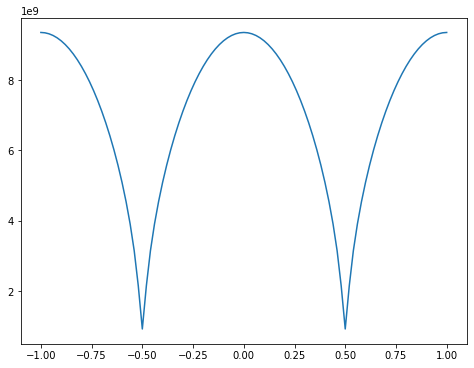

In [104]:
d = 0
Ec = 230e6
Ej = 50e9
d = 0
flux_vec = np.linspace(-1,1,101)
fq_vec = [fq(Ec, Ej, N, 0, flux, d) for flux in flux_vec]
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(flux_vec, fq_vec)

Varying d and see how the flux tuneability depends on the asymmetry factor.

# Exercise 3

(i) Create the system where a split-junction CPB qubit is coupled to a
cavity. <br>
(ii)  Using the built-in function "spectrum" to simulate spectroscopic
measurements on the system.

## Qubit-cavity coupling

Given $E_J=50GHz$, $E_C=230MHz$, $d=0$, $n_g=0$, $g=80MHz$, $f_c=6GHz$, $\kappa=1e6$, $\gamma=1000e6$, $n_{th}=0.1$, use the JCM model and $E_{01}$ function constructed in the previous exercises, create a system where a split-junction CPB is coupled to a cavity

Type your codes here

In [107]:
Nc = 15
Nq = 10
Ec = 230e6
Ej = 50e9
d = 0
fc = 6e9
g = 80e6

kappa = 1e6 
gamma = 1000e6

# operators
a  = tensor(destroy(Nc), qeye(2))
sm = tensor(qeye(Nc), destroy(2))

# Hamiltonian
def qubit_cavity(flux):
    H = fc * a.dag() * a + fq(Ec, Ej, Nq, 0, flux, d) * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())
    return H

## Absorption spectrum

In cQED experiments we typically measure the absorption spectrum of the cavity in order to detect the qubit-cavity coupling. <br>

Assuming we are sweeping around the cavity frequency (say from 5.995GHz to 6.005GHz) while varying the applied flux $\Phi$, use the built-in function [spectrum](https://qutip.org/docs/latest/apidoc/functions.html?highlight=spectrum#qutip.correlation.spectrum)  in QuTiP to simulate the experimental outcome 

Type your codes here

/Users/lulu/opt/anaconda3/lib/python3.7/site-packages/qutip/essolve.py:160: LinAlgWarning: Ill-conditioned matrix (rcond=3.65847e-18): result may not be accurate.
  v0 = la.solve(v, r0)
/Users/lulu/opt/anaconda3/lib/python3.7/site-packages/qutip/essolve.py:160: LinAlgWarning: Ill-conditioned matrix (rcond=3.67765e-18): result may not be accurate.
  v0 = la.solve(v, r0)
/Users/lulu/opt/anaconda3/lib/python3.7/site-packages/qutip/essolve.py:160: LinAlgWarning: Ill-conditioned matrix (rcond=3.53833e-18): result may not be accurate.
  v0 = la.solve(v, r0)
/Users/lulu/opt/anaconda3/lib/python3.7/site-packages/qutip/essolve.py:160: LinAlgWarning: Ill-conditioned matrix (rcond=3.76642e-18): result may not be accurate.
  v0 = la.solve(v, r0)
/Users/lulu/opt/anaconda3/lib/python3.7/site-packages/qutip/essolve.py:160: LinAlgWarning: Ill-conditioned matrix (rcond=3.76642e-18): result may not be accurate.
  v0 = la.solve(v, r0)
/Users/lulu/opt/anaconda3/lib/python3.7/site-packages/qutip/essolve.py

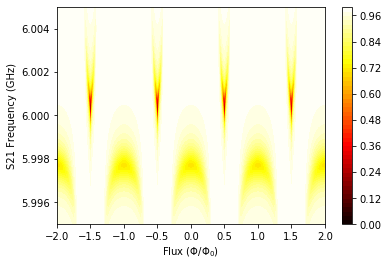

In [101]:
flux_vec = np.linspace(-1,1,101)
n_th = 0.1
wlist = np.linspace(5.995e9, 6.005e9, 201)
spec = np.zeros((len(flux_vec), len(wlist)))


i = 0
for flux in flux_vec:
    H = qubit_cavity(flux)
    
    n_th = 0.1 # finite bath temp in terms of excitation number
    c_ops = [np.sqrt(kappa * (1 + n_th)) * a, np.sqrt(kappa * n_th) * a.dag(), np.sqrt(gamma) * sm]

    spec[i,:] = spectrum(H, wlist, c_ops, a.dag(), a) 
    i = i+1
    

#plot the spectrum
FreqMesh, ControlMesh = np.meshgrid(wlist, flux_vec);
fig1, ax1 = plt.subplots()
cs = ax1.contourf(ControlMesh,FreqMesh/1e9,1-spec/np.max(spec),50, cmap='hot');
ax1.set_xlabel('Flux ($\Phi/\Phi_0$)')
ax1.set_ylabel('S21 Frequency (GHz)')
plt.colorbar(cs)

Now change the value of the asymmetry factor d such that no matter what flux you applied, the qubit frequency is always above the cavity frequency. Simulate the absorption spectrum again and see what it looks like now.

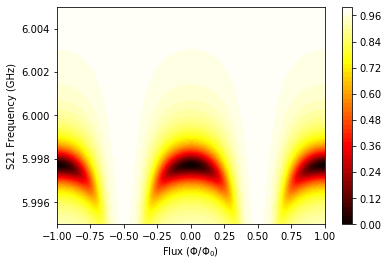

In [105]:
d = 0.5

flux_vec = np.linspace(-1,1,101)
n_th = 0.1
wlist = np.linspace(5.995e9, 6.005e9, 201)
spec = np.zeros((len(flux_vec), len(wlist)))


i = 0
for flux in flux_vec:
    H = qubit_cavity(flux)
    
    n_th = 0.1 # finite bath temp in terms of excitation number
    c_ops = [np.sqrt(kappa * (1 + n_th)) * a, np.sqrt(kappa * n_th) * a.dag(), np.sqrt(gamma) * sm]

    spec[i,:] = spectrum(H, wlist, c_ops, a.dag(), a) 
    i = i+1
    

#plot the spectrum
FreqMesh, ControlMesh = np.meshgrid(wlist, flux_vec);
fig1, ax1 = plt.subplots()
cs = ax1.contourf(ControlMesh,FreqMesh/1e9,1-spec/np.max(spec),50, cmap='hot');
ax1.set_xlabel('Flux ($\Phi/\Phi_0$)')
ax1.set_ylabel('S21 Frequency (GHz)')
plt.colorbar(cs)